## Length Analysis

In [1]:
%matplotlib inline

In [7]:
# Import library and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
!ls ../../

CATH           FamilyProfiles Profiles       TMalign        dataset.csv
Config         Makefile       README.md      _History       src
Development    NewProtEvol    STRIDE         _Tests


In [9]:
PATH = '../../'
DIR = 'FamilyProfiles/'

In [10]:
import os

Lengths, TemplateCounts = [], []
for file in os.listdir(PATH + DIR):
    if not file.startswith("Family"): continue
    with open(PATH + DIR + file) as fFamily:
        tokens = fFamily.read().split()
        Lengths.append(int(tokens[5]))
        TemplateCounts.append(int(tokens[7]))

[Text(0.5,0,'')]

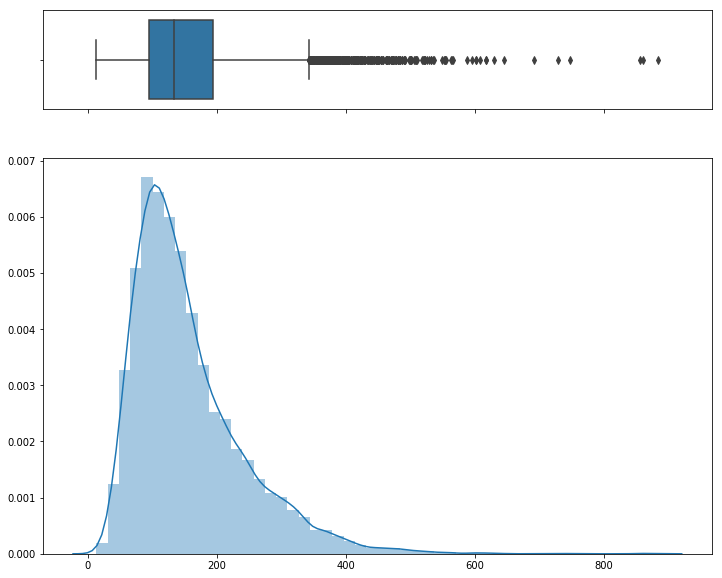

In [11]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=[12, 10])
 
# Add a graph in each part
sns.boxplot(Lengths, ax=ax_box)
sns.distplot(Lengths, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

In [12]:
sum(TemplateCounts)

1858524

## Regression Model

### Load data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%matplotlib inline

In [29]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [30]:
import plaidml.keras
plaidml.keras.install_backend()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
DPATH = 'dataset.csv'

In [5]:
AAlist = [
    'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P',
    'S', 'T', 'W', 'Y', 'V'
]
pdHeader = ['ID', 'Solvent', 'SecondaryS', 'Alignment', 'DFIRE2'
            ] + ['Pot_' + AA
                 for AA in AAlist] + ['Freq_' + AA
                                      for AA in AAlist] + ['Fitness']

In [6]:
df = pd.read_csv(DPATH, names=pdHeader)
df.head()

,ID,Solvent,SecondaryS,Alignment,DFIRE2,Pot_A,Pot_R,Pot_N,Pot_D,Pot_C,...,Freq_K,Freq_M,Freq_F,Freq_P,Freq_S,Freq_T,Freq_W,Freq_Y,Freq_V,Fitness
0,3ce9A01-1iqcA02-154,1.10332,1.11589,0.210212,-3.34437,1.867020,-0.329162,4.604260,1.256290,1.16004,...,0.709290,1.600730,0.969261,0.647722,1.540010,0.869046,1.735630,0.955530,1.730530,0.28139
1,3ce9A01-1eavA00-154,1.14688,1.18029,0.230569,-3.80797,2.420280,-0.271734,0.315953,3.354960,0.00000,...,0.244186,0.864045,0.888700,1.801730,1.221180,1.248070,0.613874,1.731540,0.816842,0.43198
2,3ce9A01-2l6hA00-154,1.13107,1.09655,0.246301,-4.08383,0.385006,-0.188539,-0.458263,1.023380,0.00000,...,0.476738,2.833120,2.003480,0.263055,1.221180,0.268033,0.613874,0.179524,0.202107,0.24474
3,3ce9A01-1nvmB02-154,1.12012,1.14180,0.263712,-3.68849,0.321031,-0.341497,-0.457396,0.030274,0.00000,...,0.453469,0.779141,0.517108,1.417060,0.902358,0.268033,0.613874,0.208480,1.071580,0.30722
4,3ce9A01-4gl8A01-154,1.11168,1.11525,0.209374,-3.41074,0.270029,-0.343361,0.338566,0.321517,0.00000,...,0.941841,0.779141,0.597669,0.263055,1.858830,0.647059,1.735630,0.984486,0.202107,0.34840


[Text(0.5, 0, '')]

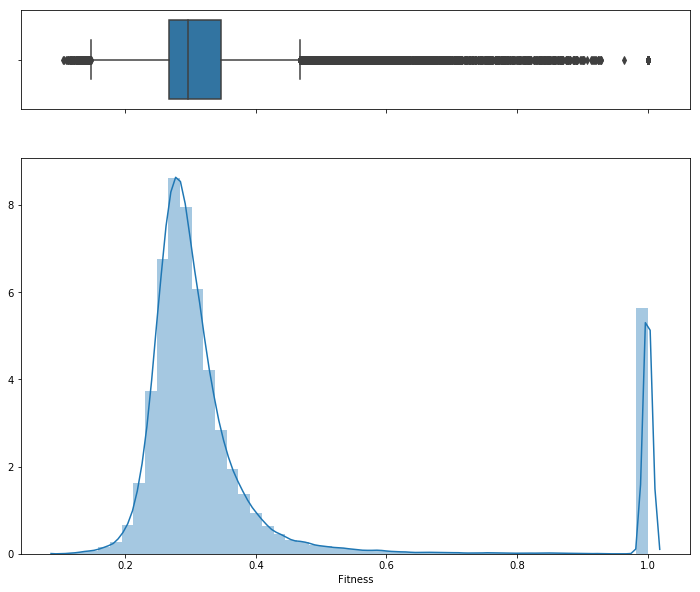

In [7]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=[12, 10])
 
# Add a graph in each part
sns.boxplot(df['Fitness'], ax=ax_box)
sns.distplot(df['Fitness'], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

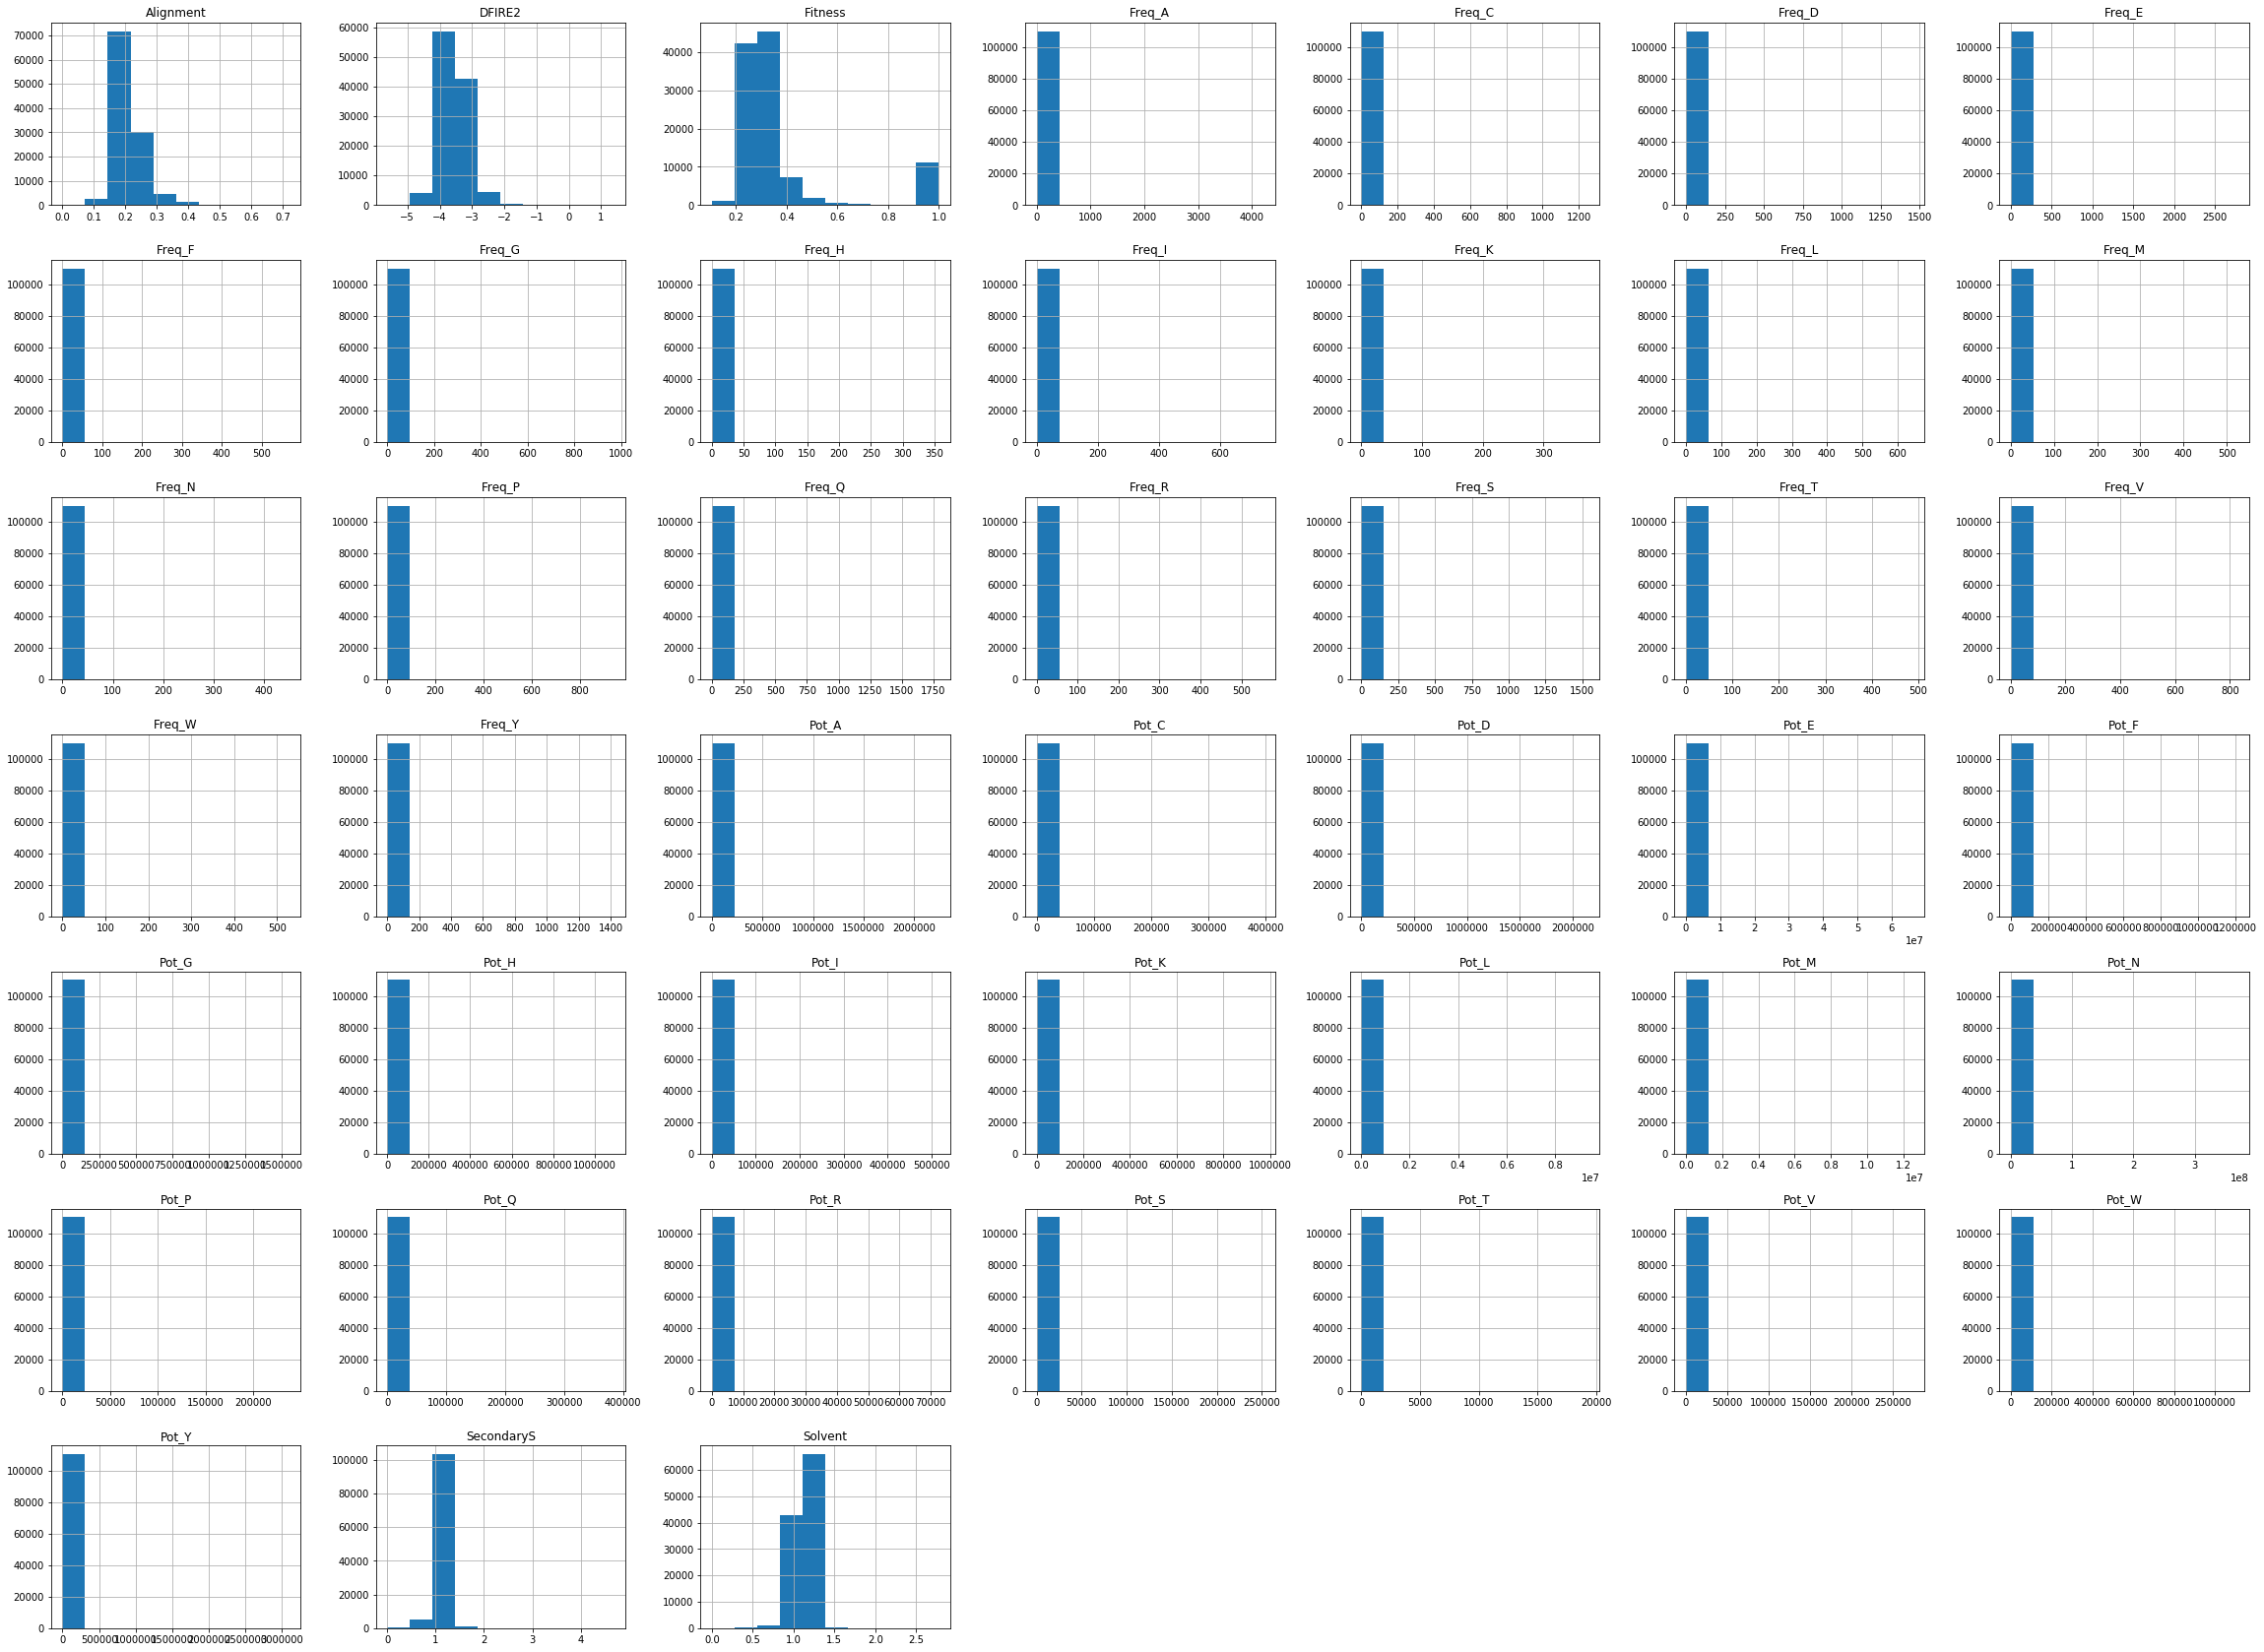

In [69]:
df.hist(figsize = (40,30))
plt.show()

In [74]:
df.iloc[df['Pot_G'].idxmax(),]

ID            2y8tA03-1vq8P03-55
Solvent                 0.649375
SecondaryS              0.163789
Alignment               0.101087
DFIRE2                  -3.77992
Pot_A                   0.723928
Pot_R                          0
Pot_N                          0
Pot_D                    2.13719
Pot_C                          0
Pot_Q                    7.10401
Pot_E                    1.29606
Pot_G                1.55111e+06
Pot_H                          0
Pot_I                    0.98957
Pot_L                          0
Pot_K                    1.25552
Pot_M                          0
Pot_F                          0
Pot_P                          0
Pot_S                  -0.670156
Pot_T                    2.45486
Pot_W                          0
Pot_Y                          0
Pot_V                          0
Freq_A                  0.798271
Freq_R                         0
Freq_N                  0.707107
Freq_D                   4.62717
Freq_C                   9.50666
Freq_Q    

In [19]:
from sklearn.model_selection import train_test_split 

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
X_train.shape

(82650, 44)

In [26]:
train_data, test_data, train_targets, test_targets = X_train, X_test, y_train, y_test

### Build model

In [62]:
from keras import models
from keras import layers
from keras import regularizers


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0005),
                           activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0005),
                           activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.0005),
                           activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [34]:
import numpy as np

k = 6
num_val_samples = len(train_data) // k
num_epochs = 20
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=128, verbose=1)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/20
68875/68875 [==============================] - 3s 43us/step - loss: 4118406900.5065 - mean_absolute_error: 437.4271
Epoch 2/20
68875/68875 [==============================] - 3s 37us/step - loss: 4333055857.7906 - mean_absolute_error: 421.3018
Epoch 3/20
68875/68875 [==============================] - 2s 34us/step - loss: 3415958310.7770 - mean_absolute_error: 398.8082
Epoch 4/20
68875/68875 [==============================] - 2s 33us/step - loss: 3460286129.8855 - mean_absolute_error: 371.4910
Epoch 5/20
68875/68875 [==============================] - 2s 33us/step - loss: 4239045567.4095 - mean_absolute_error: 418.5547
Epoch 6/20
68875/68875 [==============================] - 3s 50us/step - loss: 1348492036.1777 - mean_absolute_error: 301.8314
Epoch 7/20
68875/68875 [==============================] - 2s 34us/step - loss: 2645681675.5972 - mean_absolute_error: 384.6992
Epoch 8/20
68875/68875 [==============================] - 2s 35us/step - loss: 4315158095.4

In [35]:
all_scores

[8.550883016549523,
 148.64381344158724,
 20.404222542266016,
 234.70264067353872,
 78.4073040137663,
 663.362171068542]

In [37]:
np.mean(all_scores)

192.345172459375

In [65]:
num_epochs = 50
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=1)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Train on 68875 samples, validate on 13775 samples
Epoch 1/50
68875/68875 [==============================] - 13s 184us/step - loss: 24981066183.6594 - mean_absolute_error: 1045.3836 - val_loss: 874295.0887 - val_mean_absolute_error: 26.6082
Epoch 2/50
68875/68875 [==============================] - 11s 157us/step - loss: 1333757368.8785 - mean_absolute_error: 314.1377 - val_loss: 102198.1678 - val_mean_absolute_error: 8.7895
Epoch 3/50
68875/68875 [==============================] - 11s 160us/step - loss: 22050023.2450 - mean_absolute_error: 57.7059 - val_loss: 20054.4055 - val_mean_absolute_error: 3.7384
Epoch 4/50
68875/68875 [==============================] - 11s 166us/step - loss: 53033083.8255 - mean_absolute_error: 62.6305 - val_loss: 3320.3527 - val_mean_absolute_error: 2.1645
Epoch 5/50
68875/68875 [==============================] - 11s 167us/step - loss: 39665740.3449 - mean_absolute_error: 47.2969 - val_loss: 340.7479 - val_mean_absolute_error: 0.7646
Epoch 6

KeyboardInterrupt: 

In [40]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

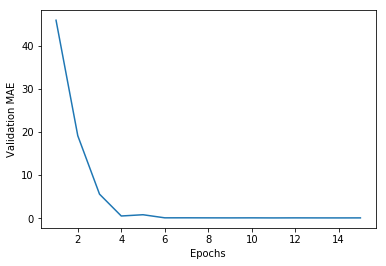

In [41]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [43]:
!pip install keras_sequential_ascii

  Running setup.py bdist_wheel for keras-sequential-ascii ... done
  Stored in directory: /Users/blaze/Library/Caches/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [45]:
from keras_sequential_ascii import keras2ascii # install with pip
keras2ascii(build_model())

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          44
               Dense   XXXXX -------------------      2880    20.0%
                relu   #####          64
               Dense   XXXXX -------------------      4160    29.0%
                relu   #####          64
               Dense   XXXXX -------------------      4160    29.0%
                relu   #####          64
               Dense   XXXXX -------------------      2080    14.5%
                relu   #####          32
               Dense   XXXXX -------------------      1056     7.3%
                relu   #####          32
               Dense   XXXXX -------------------        33     0.2%
                       #####           1


In [46]:
build_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 64)                2880      
_________________________________________________________________
dense_104 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_105 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_106 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_107 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 33        
Total params: 14,369
Trainable params: 14,369
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = build_model()
# Train it on the entirety of the data.
model.fit(X_train, y_train,
          epochs=5, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

Epoch 1/5
82650/82650 [==============================] - 20s 237us/step - loss: 347088393.9919 - mean_absolute_error: 99.7170
Epoch 2/5
82650/82650 [==============================] - 19s 235us/step - loss: 172552.5813 - mean_absolute_error: 3.3756
Epoch 3/5
82650/82650 [==============================] - 19s 235us/step - loss: 2.7143 - mean_absolute_error: 0.1237
Epoch 4/5
15040/82650 [====>.........................] - ETA: 16s - loss: 0.0313 - mean_absolute_error: 0.1012

KeyboardInterrupt: 

## Modeller

In [2]:
!ls

Genetic Algorithm.ipynb                 XOR + Alphanumeric Recognition.ipynb
Model.ipynb                             dataset.csv
NaïveBayes & LogisticRegression.ipynb


In [97]:
source_pdb='../../CATH/1vq8P03'
template='1vq8P03'
seq_name = 'DIS'
seq = 'NSKEDWESRIRAQRTKLRELRDEGTLSSSQYRDLYDKAGGGEFDSVADLERYIDA'

In [98]:
from random import randint, choice

AAlist = [
    'A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P',
    'S', 'T', 'W', 'Y', 'V'
]
seq_list = list(seq)
changes = len(seq)
for i in range(changes):
    j = randint(0, len(seq) - 1)
    seq_list[j] = choice(AAlist)
seq = ''.join(seq_list)

In [99]:
changes

55

In [100]:
seq

'NWIWFNESRQRANESMWRECFDWTTPTKSQWKDFYDATGMVPCYTGIDLVMIFDA'

In [101]:
with open(seq_name, mode='w') as fSeq:
    fSeq.write(f'>P1;{seq_name}\nsequence:{seq_name}:::::::0.00: 0.00\n{seq}*')

In [102]:
from modeller import *

env = environ()
aln = alignment(env)
mdl = model(env, file='1vq8P03')
aln.append_model(mdl, align_codes='1vq8P03A', atom_files='1vq8P03.pdb')
aln.append(file=seq_name, align_codes=seq_name)
aln.align2d()
aln.write(file='alignment.ali', alignment_format='PIR')

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v21}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v21}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14889689   14540.712    14.200

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14890217   14541.228    14.200
openf___224_> Open           ${MODINSTALL9v21}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14938817   14588.688    14.247
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v21}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14952117   14601.677    14.259
openf___224_> Open           $

In [103]:
# Comparative modeling by the automodel class
from modeller import *              # Load standard Modeller classes
from modeller.automodel import *    # Load the automodel class
from modeller import soap_protein_od


log.verbose()    # request verbose output
env = environ()  # create a new MODELLER environment to build this model in

# directories for input atom files
env.io.atom_files_directory = ['.']

a = automodel(env,
              alnfile  = 'alignment.ali',     # alignment filename
              knowns   = '1vq8P03A',              # codes of the templates
              sequence = seq_name, # code of the target
              assess_methods=(assess.DOPE,
                              #soap_protein_od.Scorer(),
                              assess.GA341))
a.starting_model= 1                 # index of the first model
a.ending_model  = 1                 # index of the last model
                                    # (determines how many models to calculate)
a.make()                            # do the actual comparative modeling

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v21}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v21}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14889689   14540.712    14.200

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14890217   14541.228    14.200
openf___224_> Open           ${MODINSTALL9v21}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14938817   14588.688    14.247
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v21}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14952117   14601.677    14.259
openf___224_> Open           $

getdata_643_> Protein accepted:  1vq8P03A
getdata_289_> Proteins (all/accepted):        1        1

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:     15580798   15215.623    14.859

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:     15646334   15279.623    14.922
make_re_422_> Number of previous, current restraints         :     2293     2331
make_re_423_> Number of previous, current selected restraints:     2237     2275
make_re_417_> Restraint type to be calculated:  chi3_dihedral

Dynamically allocated memory at   amaxstructure [B,KiB,MiB]:     15646334   15279.623    14.922
openf___224_> Open           ${MODINSTALL9v21}/modlib/chi1234.bin
openf___224_> Open           ${MODINSTALL9v21}/modlib/chi3.mdt
getdata_643_> Protein accepted:  1vq8P03A
getdata_289_> Proteins (all/accepted):        1        1
make_re_422_> Number of previous, current restraints         :     2331     2346
make_re_423_> Number of previous, current selected restraints:     2275     2

Sequence length          :           55
Compactness              :     0.276477
Native energy (pair)     :   -82.590116
Native energy (surface)  :     2.750488
Native energy (combined) :    -4.014706
Z score (pair)           :    -2.769409
Z score (surface)        :    -1.747205
Z score (combined)       :    -2.647390
GA341 score              :     0.457261



>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :       55
Number of all, selected real atoms                :      471     471
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :     4046    4046
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     1029
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDA